In [1]:
# Conect ke google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Melakukan inport library yang di perlukan
import os 
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint

In [6]:
# Menampilkan kelas pada kategori training
categories1=os.listdir('/content/gdrive/MyDrive/Biji Kopi/train')
print('kelas pada kategori train')
categories1

kelas pada kategori train


['Dark', 'Light', 'Medium', 'Green']

In [4]:
# Menampilkan kelas pada kategori testing
categories2=os.listdir('/content/gdrive/MyDrive/Biji Kopi/test')
print('kelas pada kategori test')
categories2

kelas pada kategori test


['Dark', 'Light', 'Medium', 'Green']

**Penjelasan Program :**

Program dibawah memuat dua set dataset gambar, yaitu training set dan test set. Keduanya disimpan ke dalam variabel training_set dan test_set secara berurutan.Untuk memuat setiap dataset gambar, fungsi image_dataset_from_directory menerima beberapa argumen, yaitu:

- directory: direktori tempat dataset gambar disimpan. Dalam program tersebut, direktori training set dan test set adalah /content/gdrive/MyDrive/Biji Kopi/train dan /content/gdrive/MyDrive/Biji Kopi/test masing-masing.

- image_size: ukuran dimensi gambar yang ingin digunakan untuk training model. Dalam program tersebut, ukuran dimensi gambar yang digunakan adalah 224 x 224 piksel.

- batch_size: jumlah sampel yang akan dimuat pada setiap batch. Dalam program tersebut, setiap batch berisi 32 sampel.

- label_mode: mode label pada dataset. Dalam program tersebut, label mode menggunakan 'categorical' yang artinya label pada setiap sampel diubah menjadi one-hot encoding format.

In [102]:
training_set = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Biji Kopi/train',
                                                                   image_size=(224,224), 
                                                                   batch_size=32,
                                                                   label_mode='categorical')

test_set = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Biji Kopi/test',
                                                                   image_size=(224,224), 
                                                                   batch_size=32,                                                       
                                                                   label_mode='categorical')

Found 1200 files belonging to 4 classes.
Found 400 files belonging to 4 classes.


**Penjelasan Program :**

Program tersebut merupakan definisi sebuah model neural network menggunakan modul tensorflow.keras. Model tersebut didefinisikan sebagai objek dari class Sequential, yang berarti layer-layer neural network ditambahkan secara berurutan.Lebih spesifiknya, program tersebut mendefinisikan model yang terdiri dari beberapa layer, yaitu:

- Conv2D: layer konvolusi yang memiliki 32 filter dengan ukuran kernel 3x3, fungsi aktivasi ReLU, dan input shape 224x224x3 (karena dataset gambar memiliki ukuran 224x224 piksel dan memiliki 3 channel).

- BatchNormalization: layer normalisasi batch.

- MaxPooling2D: layer pooling maksimum dengan ukuran kernel 2x2.

- Dropout: layer dropout dengan tingkat dropout sebesar 0.1.
Beberapa layer konvolusi, normalisasi batch, pooling, dan dropout lainnya, yang dilakukan dengan konfigurasi serupa dengan layer-layer sebelumnya.

- Flatten: layer yang mengubah input dari bentuk matriks menjadi bentuk array.

- Dense: layer fully connected dengan 128 unit dan fungsi aktivasi ReLU.

- Dense: layer output dengan 4 unit dan fungsi aktivasi softmax.

Setelah mendefinisikan model, program tersebut mengkompilasi model dengan memilih loss function 'categorical_crossentropy', optimizer 'RMSprop', dan metrics 'accuracy'. Kemudian, program mencetak summary dari model menggunakan method summary(). Summary tersebut menampilkan jumlah parameter pada setiap layer, ukuran output pada setiap layer, serta total jumlah parameter dan jumlah parameter yang trainable pada model.

In [154]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)), # Layer konvolusi 1
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # Layer konvolusi 2
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # Layer konvolusi 3
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # Layer konvolusi 4
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), # Layer konvolusi 5
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_50 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 111, 111, 32)     0         
 ng2D)                                                           
                                                                 
 dropout_79 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_141 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_51 (Bat  (None, 109, 109, 64)   

#25 Epochs

In [118]:
model_checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/Model_Kopi_Epochs_25.h5', monitor="val_loss", save_best_only = True, verbose=1, mode = 'auto', save_freq = 'epoch')
callbacks = [model_checkpointer]

history = model.fit(x=training_set, validation_data = test_set, epochs = 25, callbacks = callbacks)

Epoch 1/25
38/38 [==============================] - ETA: 0s - loss: 0.9532 - accuracy: 0.7150
Epoch 1: val_loss improved from inf to 4.21321, saving model to /content/gdrive/MyDrive/Model_Kopi_Epochs_25.h5
38/38 [==============================] - 11s 173ms/step - loss: 0.9532 - accuracy: 0.7150 - val_loss: 4.2132 - val_accuracy: 0.4800
Epoch 2/25
38/38 [==============================] - ETA: 0s - loss: 0.2608 - accuracy: 0.8950
Epoch 2: val_loss improved from 4.21321 to 4.06286, saving model to /content/gdrive/MyDrive/Model_Kopi_Epochs_25.h5
38/38 [==============================] - 7s 179ms/step - loss: 0.2608 - accuracy: 0.8950 - val_loss: 4.0629 - val_accuracy: 0.4425
Epoch 3/25
38/38 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9400
Epoch 3: val_loss did not improve from 4.06286
38/38 [==============================] - 7s 158ms/step - loss: 0.1869 - accuracy: 0.9400 - val_loss: 10.1051 - val_accuracy: 0.2625
Epoch 4/25
38/38 [==============================

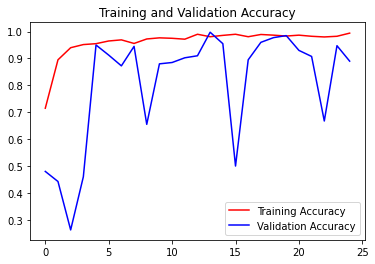

<Figure size 432x288 with 0 Axes>

In [119]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<Figure size 432x288 with 0 Axes>

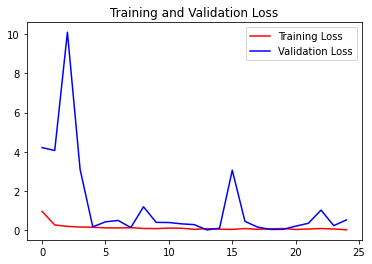

<Figure size 432x288 with 0 Axes>

In [120]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

In [121]:
val_samples = sum([y.shape[0] for [_, y] in test_set])
val_samples

400

In [122]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_set:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [123]:

import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report

y_val, y_val_pred=pred(model)

print('Confusion Matrix :')
print()
print(confusion_matrix(y_val, y_val_pred))
print()
print()
print('Classification Report :')
print()
print(classification_report(y_val, y_val_pred))

1/1 [==============================] - 0s 23ms/step
Confusion Matrix :

[[ 91   7   0   2]
 [  0 100   0   0]
 [  0   4  96   0]
 [  0  25   6  69]]


Classification Report :

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       100
           1       0.74      1.00      0.85       100
           2       0.94      0.96      0.95       100
           3       0.97      0.69      0.81       100

    accuracy                           0.89       400
   macro avg       0.91      0.89      0.89       400
weighted avg       0.91      0.89      0.89       400



#50 Epochs

In [133]:
model_checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/Model_Kopi_Epoch_50.h5', monitor="val_loss", save_best_only = True, verbose=1, mode = 'auto', save_freq = 'epoch')
callbacks = [model_checkpointer]

history = model.fit(x=training_set, validation_data = test_set, epochs = 50, callbacks = callbacks)

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 0.9530 - accuracy: 0.7175
Epoch 1: val_loss improved from inf to 4.20697, saving model to /content/gdrive/MyDrive/Model_Kopi_Epoch_50.h5
38/38 [==============================] - 12s 199ms/step - loss: 0.9530 - accuracy: 0.7175 - val_loss: 4.2070 - val_accuracy: 0.4125
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.8725
Epoch 2: val_loss improved from 4.20697 to 3.42008, saving model to /content/gdrive/MyDrive/Model_Kopi_Epoch_50.h5
38/38 [==============================] - 7s 171ms/step - loss: 0.3520 - accuracy: 0.8725 - val_loss: 3.4201 - val_accuracy: 0.5650
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.2467 - accuracy: 0.9192
Epoch 3: val_loss improved from 3.42008 to 1.04386, saving model to /content/gdrive/MyDrive/Model_Kopi_Epoch_50.h5
38/38 [==============================] - 7s 170ms/step - loss: 0.2467 - accuracy: 0.9192 - val_loss: 1.0439 - val_

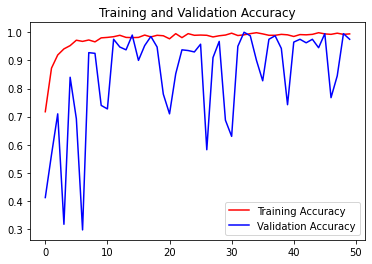

<Figure size 432x288 with 0 Axes>

In [134]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<Figure size 432x288 with 0 Axes>

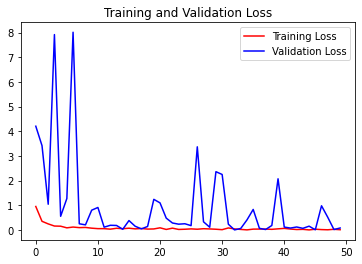

<Figure size 432x288 with 0 Axes>

In [135]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

In [136]:
val_samples = sum([y.shape[0] for [_, y] in test_set])
val_samples

400

In [137]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_set:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [138]:
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report

y_val, y_val_pred=pred(model)

print('Confusion Matrix :')
print()
print(confusion_matrix(y_val, y_val_pred))
print()
print()
print('Classification Report :')
print()
print(classification_report(y_val, y_val_pred))

1/1 [==============================] - 0s 24ms/step
Confusion Matrix :

[[100   0   0   0]
 [  2  96   1   1]
 [  0   0  99   1]
 [  5   0   0  95]]


Classification Report :

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.96      0.98       100
           2       0.99      0.99      0.99       100
           3       0.98      0.95      0.96       100

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.97      0.98       400



#75 Epochs

In [155]:
model_checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/Model_Kopi_Epoch_75.h5', monitor="val_loss", save_best_only = True, verbose=1, mode = 'auto', save_freq = 'epoch')
callbacks = [model_checkpointer]

history = model.fit(x=training_set, validation_data = test_set, epochs = 75, callbacks = callbacks)

Epoch 1/75
38/38 [==============================] - ETA: 0s - loss: 0.6394 - accuracy: 0.8158
Epoch 1: val_loss improved from inf to 4.69835, saving model to /content/gdrive/MyDrive/Model_Kopi_Epoch_75.h5
38/38 [==============================] - 12s 182ms/step - loss: 0.6394 - accuracy: 0.8158 - val_loss: 4.6984 - val_accuracy: 0.4700
Epoch 2/75
38/38 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 0.9417
Epoch 2: val_loss did not improve from 4.69835
38/38 [==============================] - 7s 175ms/step - loss: 0.1794 - accuracy: 0.9417 - val_loss: 5.1271 - val_accuracy: 0.2600
Epoch 3/75
38/38 [==============================] - ETA: 0s - loss: 0.1410 - accuracy: 0.9525
Epoch 3: val_loss improved from 4.69835 to 0.69274, saving model to /content/gdrive/MyDrive/Model_Kopi_Epoch_75.h5
38/38 [==============================] - 7s 172ms/step - loss: 0.1410 - accuracy: 0.9525 - val_loss: 0.6927 - val_accuracy: 0.7450
Epoch 4/75
38/38 [==============================] -

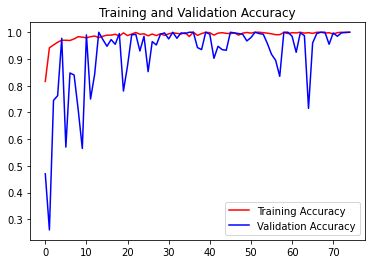

<Figure size 432x288 with 0 Axes>

In [156]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<Figure size 432x288 with 0 Axes>

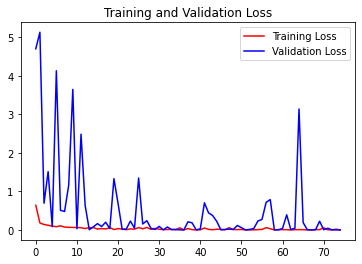

<Figure size 432x288 with 0 Axes>

In [157]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

In [158]:
val_samples = sum([y.shape[0] for [_, y] in test_set])
val_samples

400

In [159]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_set:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [160]:
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report

y_val, y_val_pred=pred(model)

print('Confusion Matrix :')
print()
print(confusion_matrix(y_val, y_val_pred))
print()
print()
print('Classification Report :')
print()
print(classification_report(y_val, y_val_pred))

1/1 [==============================] - 0s 22ms/step
Confusion Matrix :

[[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]


Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

